# Data Normalization and Outlier Detection

In this notebook, we are performing data normalization and outlier detection on a generated dataset. The steps involved are:

1. **Data Generation**: We generate a dataset using `make_regression` from `sklearn.datasets`.
2. **Data Visualization**: We plot the non-normalized data to visualize its distribution.
3. **Normalization**: We normalize the data using a specified mean and standard deviation.
4. **Normalized Data Visualization**: We plot the normalized data to visualize the changes after normalization.
5. **Outlier Detection**: We use the `EllipticEnvelope` from `sklearn.covariance` to detect outliers in both the normalized and non-normalized data.
6. **Outlier Visualization**: We plot the detected outliers in both the normalized and non-normalized data.

The variables used in this notebook include:
- `x` and `y`: The generated features and target values.
- `mean` and `standard_deviation`: The values used for normalizing the data.
- `x_normalized`: The normalized features.
- `covariance`: The `EllipticEnvelope` object used for outlier detection.
- `outliers`: The array indicating which points are outliers.

We also use various libraries such as `pandas`, `numpy`, `matplotlib`, and `sklearn` for data manipulation, visualization, and modeling.

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.covariance import EllipticEnvelope

```markdown
## Data Generation and Visualization

In this cell, we generate a synthetic dataset using the `make_regression` function from `sklearn.datasets`. The dataset consists of 100,000 samples and 20 features, with a noise level of 15. The random state is set to 42 to ensure reproducibility. After generating the data, we plot the non-normalized data to visualize its distribution.

The code used for this process is as follows:

```python
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100000, n_features=20, noise=15, random_state=42)
plt.title('Non-Normalized Generated Data')
plt.plot(x, y, 'o')
plt.show()
```
```

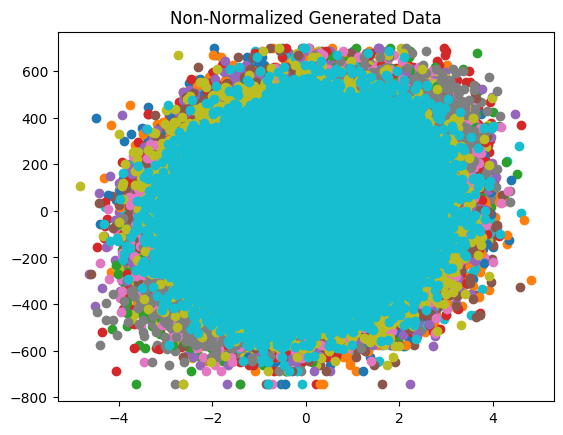

In [15]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100000, n_features=20, noise=15, random_state=42)
plt.title('Non-Normalized Generated Data')
plt.plot(x, y, 'o')
plt.show()

```markdown
## Data Normalization

In this cell, we normalize the generated dataset using the specified mean and standard deviation. The normalization process involves subtracting the mean from each feature and then dividing by the standard deviation. This ensures that the data has a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms.

The code used for this process is as follows:

```python
mean = 100  # According to the value of assignment
standard_deviation = 4  # According to the value of assignment
x = x.to_device('cpu')
x.dtype
```
```

In [16]:
mean = 100 # According to the value of assignment
standard_deviation = 4 # According to the value of assignment
x = x.to_device('cpu')
x.dtype

dtype('float64')

```markdown
## Data Normalization

In this cell, we normalize the generated dataset using the specified mean and standard deviation. The normalization process involves subtracting the mean from each feature and then dividing by the standard deviation. This ensures that the data has a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms.

The code used for this process is as follows:

```python
x_normalized = (x - mean) / standard_deviation
x_normalized.dtype
```

The mathematical equation for converting the dataset to its normalized form is:
$$ 
x_{\text{normalized}} = \frac{x - \text{mean}}{\text{standard deviation}} 
$$

where:
- \( x \) is the original dataset,
- \( \text{mean} \) is the mean value used for normalization,
- \( \text{standard deviation} \) is the standard deviation used for normalization.

In [17]:
x_normalized = (x - mean) / standard_deviation
x_normalized.dtype

dtype('float64')

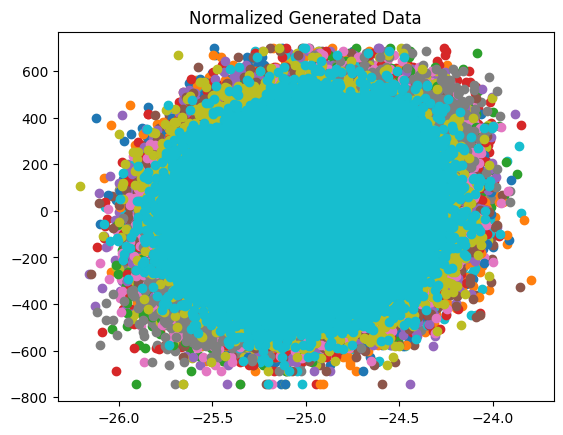

In [18]:
plt.plot(x_normalized, y, 'o')
plt.title('Normalized Generated Data')
plt.show()

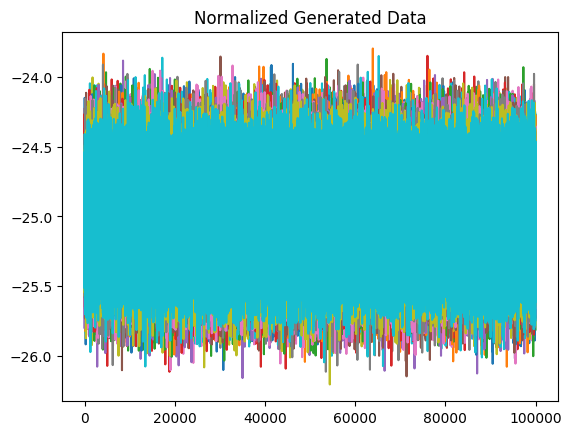

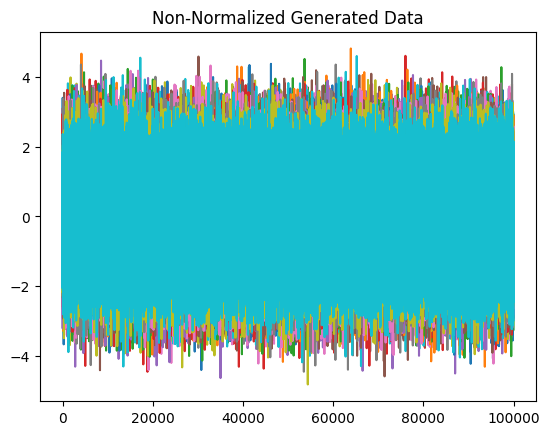

In [19]:
plt.plot(x_normalized)
plt.title('Normalized Generated Data')
plt.show()

plt.plot(x)
plt.title('Non-Normalized Generated Data')
plt.show()

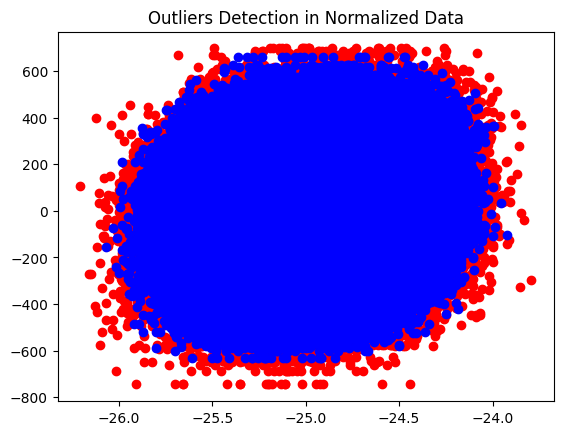

In [24]:
covariance = EllipticEnvelope(contamination=0.1)
covariance.fit(x_normalized)
outliers = covariance.predict(x_normalized)
plt.plot(x_normalized[outliers == -1], y[outliers == -1], 'ro')
plt.plot(x_normalized[outliers == 1], y[outliers == 1], 'bo')
plt.title('Outliers Detection in Normalized Data')
plt.show()

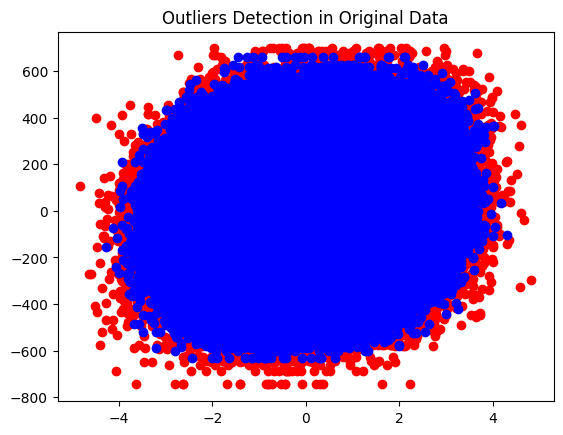

In [25]:
covariance = EllipticEnvelope(contamination=0.1)
covariance.fit(x)
outliers = covariance.predict(x)
plt.plot(x[outliers == -1], y[outliers == -1], 'ro')
plt.plot(x[outliers == 1], y[outliers == 1], 'bo')
plt.title('Outliers Detection in Original Data')
plt.show()